<a href="https://colab.research.google.com/github/bthodla/danano/blob/master/prj5/slide_deck_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Analysis of Prosper Loan Data
## by Bhasker Thodla

## Investigation Overview

> My goal is to present my analysis of the Prosper Loan data focusing on the efficacy of the loan strategy in terms of the health of loans granted, their recoverability and demographics

## Dataset Overview

> The dataset includes about 114,000 loan records from Prosper Loans, a company founded in 2005 to facilitate peer-to-peer lending in the US. The loan data is duly obfuscated to hide the identities of both borrowers and lenders and contains no peronally identifiable information (PII) to protect the privacy of the participants.

> The loan data provided ranges over a period from Nov 2005 to Mar 2014 (by loan origination date)

> The data is mostly clean although there are missing values in several fields

In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# To suppress numeric values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format

# To display all charts against a white background
plt.style.use('seaborn-whitegrid')

In [5]:
# load in the dataset into a pandas dataframe
# Loading the Prosper Loan data saved in Google Drive
# from google.colab import drive

drive.mount('/content/gdrive')
data_folder = '/content/gdrive/My Drive/Colab Notebooks/data_visualization/prj5/'
prosper_loan_data_file = data_folder + 'prosperLoanDataAdj.csv'
pld_df = pd.read_csv(prosper_loan_data_file)

# We will set the order of Nominal Variables to represent the correct order in visualizations
loan_status_order = pld_df['LoanStatus'].value_counts().index
listing_category_order = pld_df['ListingCategoryStr'].value_counts().index
borrower_state_order = pld_df['BorrowerState'].value_counts().index
comb_credit_rating_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
income_range_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']

# Finally, we will create separate dataframes for aggregate groupings - one by Income Range and another by Loan Origination Year
pld_df_ir = pld_df.groupby('IncomeRange').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].reset_index()
pld_df_year = pld_df.groupby('LoanOriginationYear').sum()[['LoanOriginalAmount', 'AmountDelinquent', 'LP_NetPrincipalLoss']].reset_index()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
pld_df_year.head()

,LoanOriginationYear,LoanOriginalAmount,AmountDelinquent,LP_NetPrincipalLoss
0,2005,78687,0.00,0.00
1,2006,28132199,0.00,"7,238,617.32"
2,2007,80787786,"14,127,473.00","23,048,548.36"
3,2008,69561850,"9,807,577.00","16,130,235.49"
4,2009,8914396,"887,316.00","800,158.90"


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.



```
# This is formatted as code
```

## 1. Year-over-year trend of Original Loan Amounts, Delinquencies and Net Principal Losses

> This visualization provides the following insights:
>> In general, yearly totals of Loan Amounts showed an increasing trend with some exceptions. For example, 2009 and 2014
>> However, Loan Delinquencies and Net Princial Losses were mostly flat indicating that they didn't rise correspondingly
>> In the years 2005 and 2007, Net Princial Losses were higher than Loan Delinquencies 

### Conclusion
> This shows that, in general, assessment of Borrowers' ability to repay (in other words, Loan Strategy)  was sound.

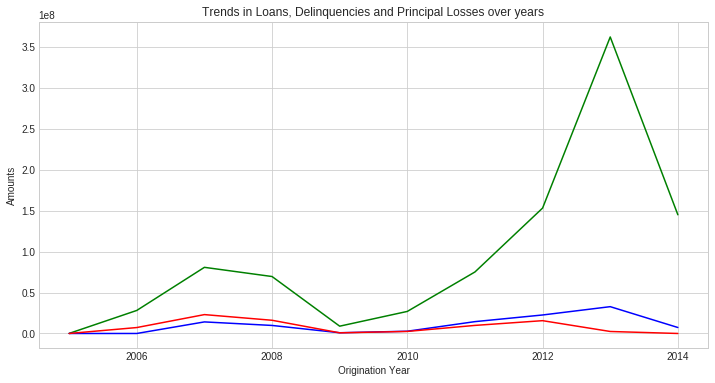

In [10]:
plt.figure(figsize=(12,6))

plt.plot(pld_df_year.LoanOriginationYear, pld_df_year.LoanOriginalAmount, color='green')
plt.plot(pld_df_year.LoanOriginationYear, pld_df_year.AmountDelinquent, color='blue')
plt.plot(pld_df_year.LoanOriginationYear, pld_df_year.LP_NetPrincipalLoss, color='red')
plt.xlabel('Origination Year')
plt.ylabel('Amounts')
plt.title('Trends in Loans, Delinquencies and Principal Losses over years')
plt.show()

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!